In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms ### turn image data to tensors
from torchvision.transforms import ToTensor

print(torch.__version__)
print(torchvision.__version__)

1.13.1+cu116
0.14.1+cu116


In [34]:
###get dataset
##fashion mnist
train_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),#how do we want to transform the data
    target_transform=None, # how do we want to transform labels or targets
    )
test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    
    )


In [35]:
len(train_data), len(test_data)

(60000, 10000)

In [36]:
class_n=test_data.classes
class_n

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [37]:
test_data.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [38]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

In [39]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [40]:
class_index=train_data.class_to_idx
class_index

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [41]:
image, label= train_data[0]
image.shape

torch.Size([1, 28, 28])

(-0.5, 27.5, 27.5, -0.5)

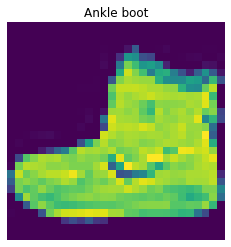

In [42]:
plt.imshow(image.squeeze())#,cmap='gray'
plt.title(class_names[label])
plt.axis(False)

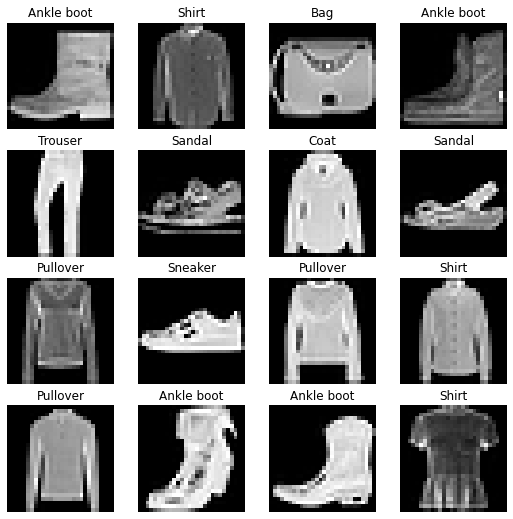

In [43]:
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows, cols= 4,4
for i in range(1, rows*cols+1):
  random_idx=torch.randint(0,len(train_data), size=[1]).item()
  img, label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)
  

In [44]:
from torch.utils.data import DataLoader

Batch_size=32

train_dataloader=DataLoader(dataset=train_data,
                      batch_size=Batch_size,
                      shuffle=True)

test_dataloader=DataLoader(dataset=test_data,
                     batch_size=Batch_size,
                     shuffle=False)

In [45]:
test_dataloader.batch_size

32

In [46]:
test_dataloader

In [47]:
train_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x7f273a9a7460>,
 <torch.utils.data.dataloader.DataLoader at 0x7f2740354ee0>)

In [48]:
len(train_dataloader)

1875

In [49]:
len(test_dataloader)


313

In [50]:
train_features, train_labels= next(iter(train_dataloader))
train_features.shape, train_labels.shape
# 32 samples in each batch

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

torch.Size([1, 28, 28])


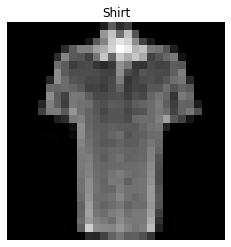

In [51]:
#show samples
torch.manual_seed(42)
random_idx= torch.randint(0, len(train_features), size=[1]).item()
image, label=train_features[random_idx], train_labels[random_idx]
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(image.shape)


In [52]:
#model
flatten_model=nn.Flatten()
x=train_features[0]
output=flatten_model(x)

print(x.shape)
print(output.shape)

torch.Size([1, 28, 28])
torch.Size([1, 784])


In [53]:
class FashionModel_0(nn.Module):
  def __init__(self, 
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),

        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)

In [54]:
torch.manual_seed(42)
model_0=FashionModel_0(input_shape=28*28,
                       hidden_units=10,
                       output_shape=len(class_names)).to('cpu')
model_0

FashionModel_0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [55]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

In [56]:
# loss and optimizer and accuracy function
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
# device
device= "cuda" if torch.cuda.is_available() else "cpu"

In [58]:
from torchmetrics import Accuracy

metrics_accuracy=Accuracy(task="multiclass",num_classes=10).to(device)

In [59]:
#loss and optimizer
loss_fn= nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [60]:
#time function
from timeit import default_timer as timer

def train_time(start: float,
               end:float,
               device:torch.device=None):
  total_time=end -start
  print(f"train time on {device} :{ total_time:.3f} seconds")

  return total_time


In [61]:
train_time(start=timer(),
           end=timer(),
           device=device)

train time on cuda :0.000 seconds


2.0600009520421736e-07

In [62]:
# for progress bar
from tqdm.auto import tqdm
### train and test

torch.manual_seed(42)

train_time_start_on_cpu=timer()

epochs=3

for epoch in tqdm(range(epochs)):
  print(f"epoch: {epoch}\n ")
  train_loss=0
  for batch, (x,y) in enumerate(train_dataloader):
    model_0.train()

    y_pred=model_0(x)

    loss=loss_fn(y_pred,y)
    train_loss +=loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 == 0:
      print(f"looked at {batch * len(x)}/{ len(train_dataloader.dataset)} samples.")

  #
  train_loss /= len(train_dataloader)


  ###test
  test_loss,test_acc= 0, 0
  model_0.eval()
  with torch.inference_mode():   
    for x_test, y_test in test_dataloader:

      test_pred=model_0(x_test)
      test_loss += loss_fn(test_pred,y_test)
      test_acc +=metrics_accuracy(test_pred.argmax(dim=1), y_test)

    #calculate test loss average per batch
    test_loss /= len(test_dataloader)

    test_acc /= len(test_dataloader)

  #print 
  print(f" \n Train loss :{ train_loss: .4f} |test loss:{test_loss:.4f} , test acc:{test_acc:.4f}")


#claculate training time
train_time_end_on_cpu= timer()
total_train_time_model_0=train_time(start=train_time_start_on_cpu,
                                    end=train_time_end_on_cpu,
                                    device=str(next(model_0.parameters()).device))

 

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
 
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.
 
 Train loss : 0.5904 |test loss:0.5095 , test acc:0.8204
epoch: 1
 
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.
 
 Train loss : 0.4763 |test loss:0.4799 , test acc:0.8320
epoch: 2
 
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.
 
 Train loss : 0.4550 |test loss:0.4766 , test acc:0.8343
train time on cpu :37.615 seconds


In [63]:
###prediction
torch.manual_seed(42)

def modeleval(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn):
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for x,y in tqdm(dataloader):
      y_pred=model(x)
      loss += loss_fn(y_pred,y)
      acc +=accuracy_fn(y_pred.argmax(dim=1), y)

    loss /= len(dataloader)
    acc /= len(dataloader)

  return {"model_name": model.__class__.__name__,
          "model_loss":loss.item(),
          "model_acc":acc}


model_0_results=modeleval(model=model_0,
                          dataloader=test_dataloader,
                          loss_fn=loss_fn,
                          accuracy_fn=metrics_accuracy
                          )

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionModel_0',
 'model_loss': 0.47663894295692444,
 'model_acc': tensor(0.8343, device='cuda:0')}

In [64]:
class FashionModel_1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
        
    )

  def forward(self, x):
    return self.layer_stack(x)

model_1=FashionModel_1(input_shape=28*28,
                       hidden_units=10,
                       output_shape=len(class_names)).to(device)
model_1

FashionModel_1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
    (5): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [65]:
###train and test loop



def train_fun(model: torch.nn.Module,
             dataloader: torch.utils.data.DataLoader,
             loss_fn:torch.nn.Module,
             optimizer:torch.optim.Optimizer,
             accuracy_fn,
             device: torch.device = device):
  
  train_loss,train_acc=0,0

  for batch, (x,y) in enumerate(dataloader):

    x, y = x.to(device), y.to(device)
    model_1.train()

    y_pred=model_1(x)

    loss= loss_fn(y_pred,y)
    train_loss +=loss
    train_acc += accuracy_fn(y_pred.argmax(dim=1), y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")
  
    
  

    







In [66]:
#### test functionizing

def test_fun(model:torch.nn.Module,
             dataloader:torch.utils.data.DataLoader,
             loss_fn:torch.nn.Module,
             optimizer:torch.optim.Optimizer,
             accuracy_fn,
             device: torch.device = device):
  
  model.eval()
  with torch.inference_mode():
    test_loss,test_acc=0,0
    for x,y in dataloader:
      x,y=x.to(device), y.to(device)
      test_pred=model(x)

      loss=loss_fn(test_pred,y)
      test_loss +=loss
      test_acc +=accuracy_fn(test_pred.argmax(dim=1),y)

    test_loss /=len(dataloader)
    test_acc /=len(dataloader)
    print(f"test loss: {test_loss:.5f} | test accuracy: {test_acc:.2f}%")



    


In [67]:
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

loss_fn= nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1)

torch.manual_seed(42)


epochs=3


for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  train_fun(model=model_1,
            dataloader=train_dataloader,
            loss_fn=loss_fn,
            optimizer=optimizer,
            accuracy_fn=metrics_accuracy,
            device=device)
  
  test_fun(model=model_1,dataloader=test_dataloader,loss_fn=loss_fn,optimizer=optimizer,accuracy_fn=metrics_accuracy,device=device)
           
            
            
            
            
            
  
train_time_end_on_gpu = timer()
total_train_time_model_1 = train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.70309 | Train accuracy: 0.74%
test loss: 0.56939 | test accuracy: 0.79%
Epoch: 1
---------
Train loss: 0.49384 | Train accuracy: 0.82%
test loss: 0.51031 | test accuracy: 0.81%
Epoch: 2
---------
Train loss: 0.45877 | Train accuracy: 0.84%
test loss: 0.49232 | test accuracy: 0.83%
train time on cuda :52.857 seconds


In [68]:
###prediction
torch.manual_seed(42)

def modeleval(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device:torch.device=device):
  
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for x,y in tqdm(dataloader):

      x,y = x.to(device), y.to(device)
      y_pred=model(x)

      loss += loss_fn(y_pred,y)
      acc +=accuracy_fn(y_pred.argmax(dim=1), y)

    loss /= len(dataloader)
    acc /= len(dataloader)

  print(f"test loss: {loss:.5f} | test accuracy: {acc:.2f}%")




In [69]:
torch.manual_seed(42)

model_1_results=modeleval(model=model_1,
                          dataloader=test_dataloader,
                          loss_fn=loss_fn,
                          accuracy_fn=metrics_accuracy
                          )
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

test loss: 0.49232 | test accuracy: 0.83%
